<a href="https://colab.research.google.com/github/SakshiKumari1802/Cervical-Cancer-Detection-Model-By-Sakshi/blob/main/cervicalcancerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# 1. Load the dataset
df = pd.read_csv('/content/cervical-cancer_csv.csv')


In [ ]:
# Display the number of rows and columns
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 835
Number of Columns: 34


In [ ]:
print("Column Names:")
for column in df.columns:
    print(column)

Column Names:
Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy


In [ ]:
# 2. Data Preprocessing
# Drop columns with more than 60% missing values
threshold = 0.6
df = df.loc[:, df.isnull().mean() < threshold]

# Fill remaining missing values with median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target
X = df_imputed.drop('Biopsy', axis=1)
y = df_imputed['Biopsy']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

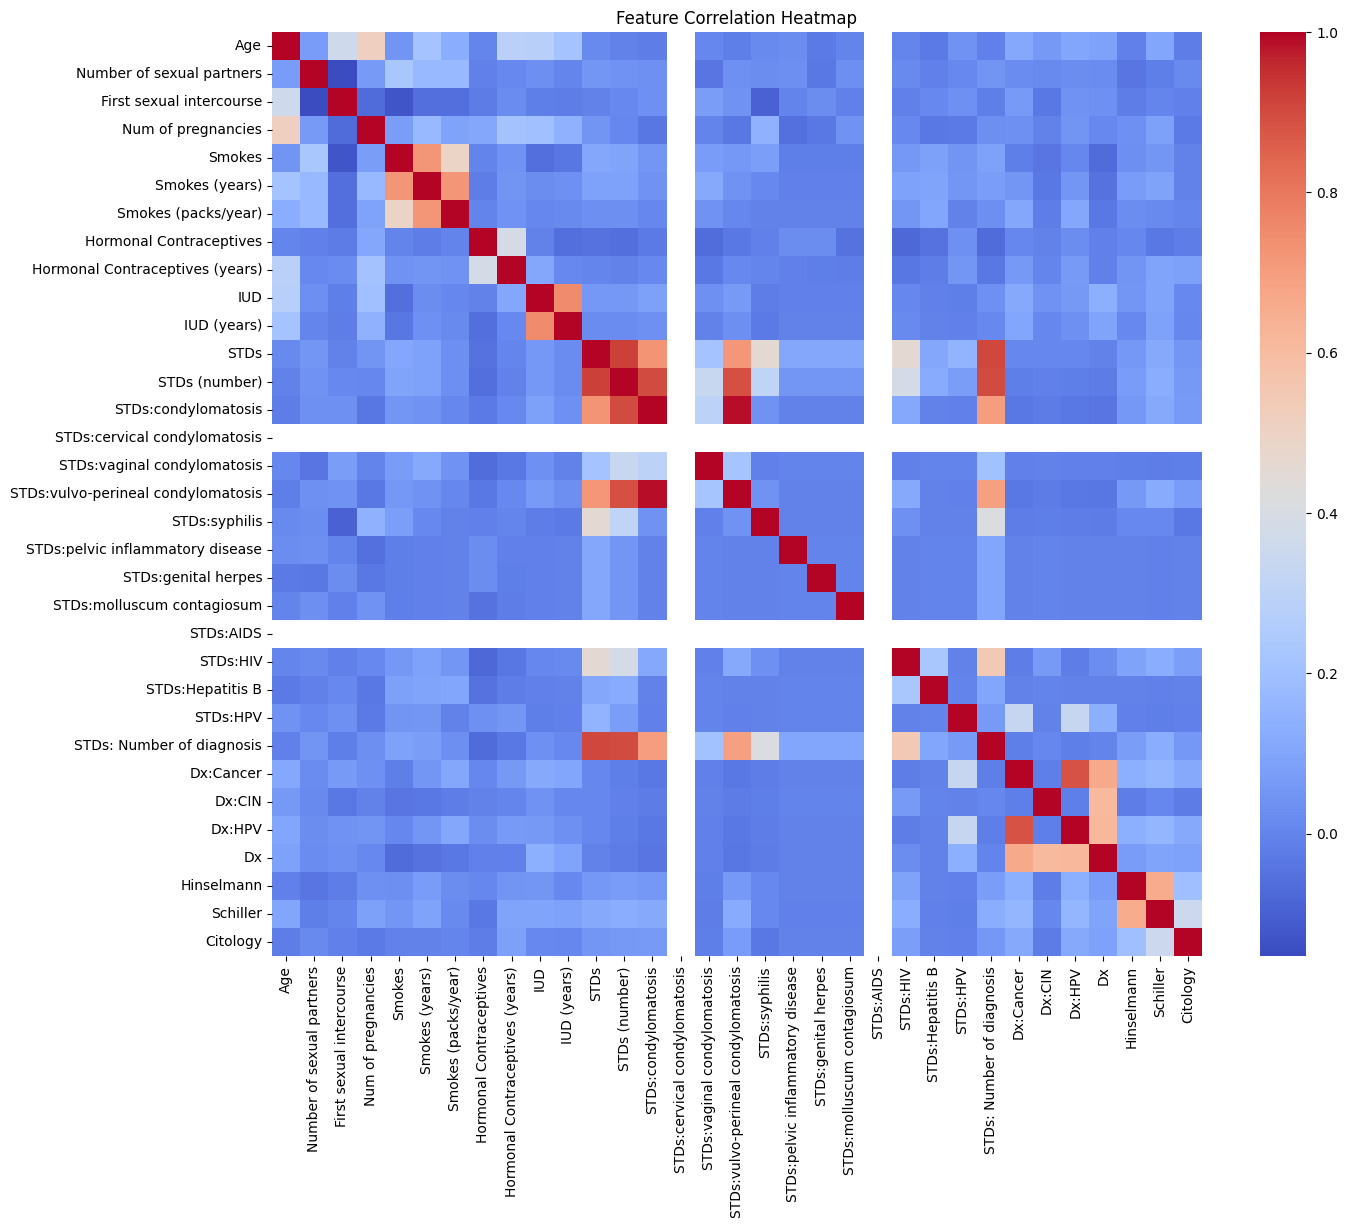

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(15, 12))
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# 4. Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}
conf_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    }

    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)
    from sklearn.metrics import classification_report





In [ ]:
from sklearn.metrics import classification_report

# Classification report for Random Forest
print("Classification Report - Random Forest")
print(classification_report(y_test, models['Random Forest'].predict(X_test)))


Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       157
         1.0       0.75      0.60      0.67        10

    accuracy                           0.96       167
   macro avg       0.86      0.79      0.82       167
weighted avg       0.96      0.96      0.96       167



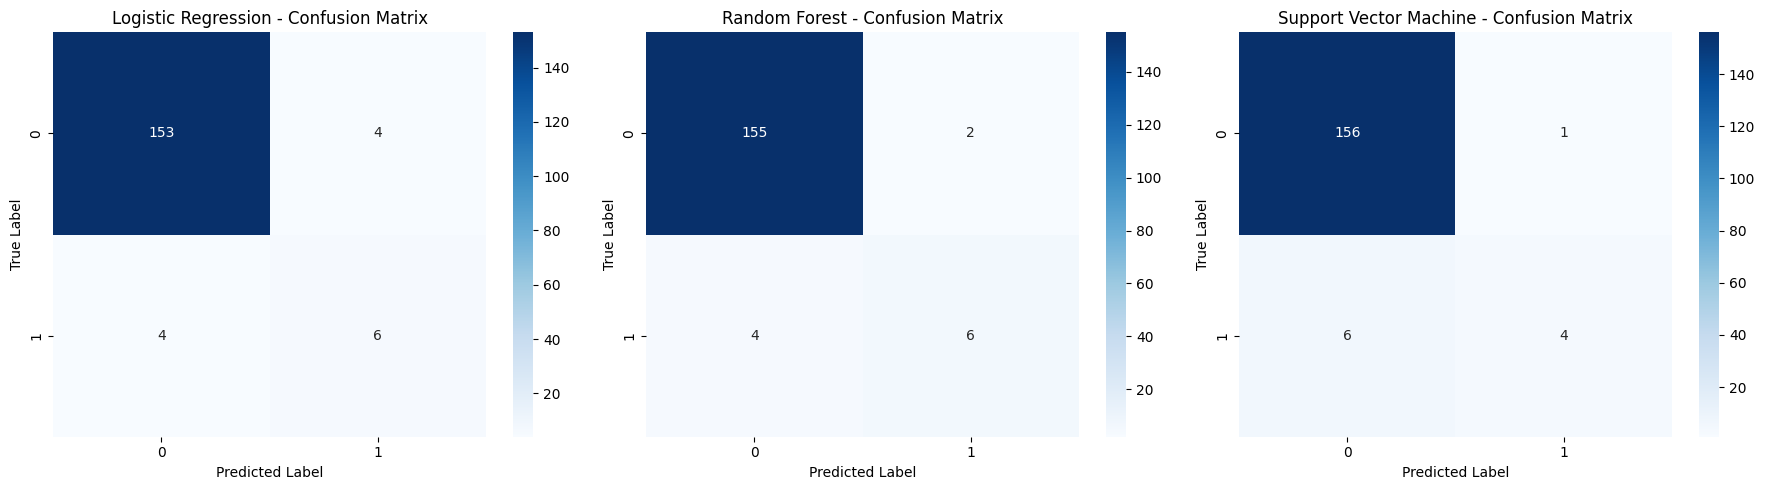

In [ ]:
# 5. Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'{model_name} - Confusion Matrix')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()


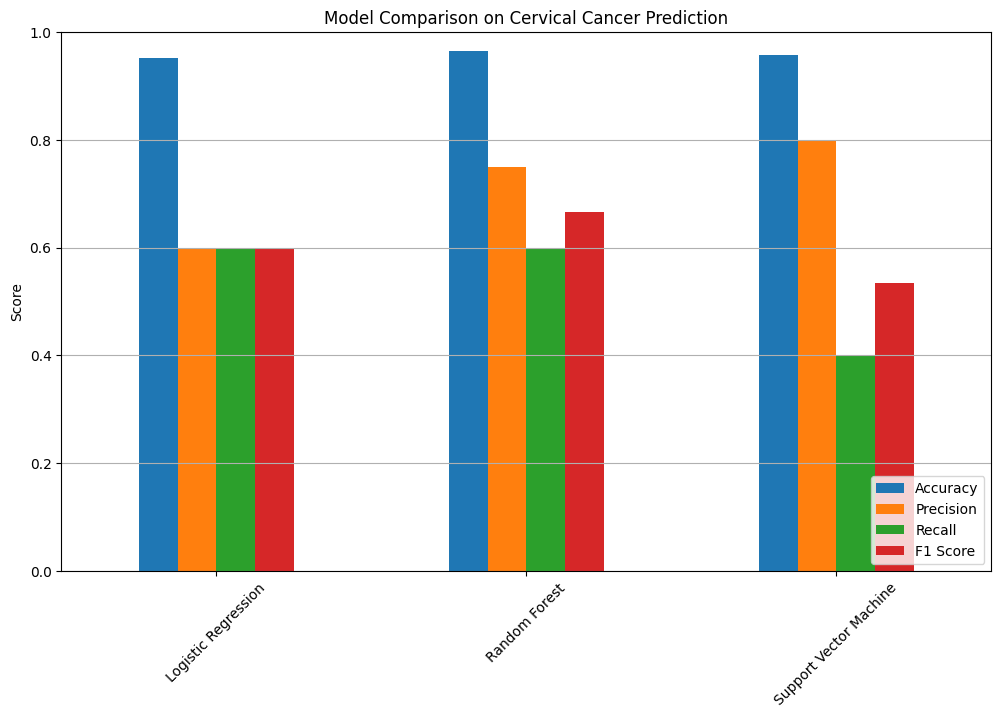

In [ ]:
# 6. Bar Graph for Metric Comparison
metrics_df = pd.DataFrame(results).T

metrics_df.plot(kind='bar', figsize=(12, 7))
plt.title('Model Comparison on Cervical Cancer Prediction')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

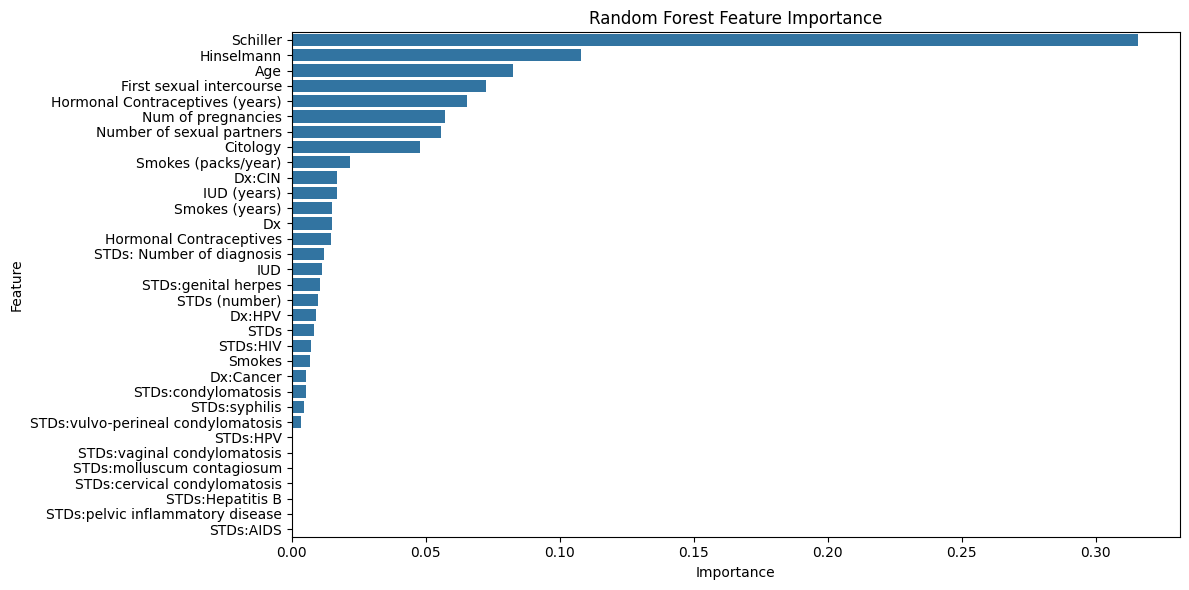

In [ ]:
# 6.1. Random Forest Feature Importance
importances = models['Random Forest'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
# 7. Print Metric Results
print("\nModel Evaluation Results:")
print(metrics_df)



Model Evaluation Results:
                        Accuracy  Precision  Recall  F1 Score
Logistic Regression     0.952096       0.60     0.6  0.600000
Random Forest           0.964072       0.75     0.6  0.666667
Support Vector Machine  0.958084       0.80     0.4  0.533333


In [ ]:
from sklearn.model_selection import cross_val_score

print("\nCross-Validation (5-Fold) - F1 Score")
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
    print(f"{model_name}: Mean F1 Score = {scores.mean():.4f}")



Cross-Validation (5-Fold) - F1 Score
Logistic Regression: Mean F1 Score = 0.5859
Random Forest: Mean F1 Score = 0.5039
Support Vector Machine: Mean F1 Score = 0.3483
